In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
Countries_df = pd.read_csv("../Data/Processed/Countries_df.csv")
Regions_df = pd.read_csv("../Data/Processed/Region_df.csv")
worldwide_df = pd.read_csv("../Data/Processed/worldwide_df.csv")

1. Trend Analysis:
- How have CO₂ emissions in each sector changed over time?
- What are the significant peaks and valleys in emissions, and how do they correlate with historical events or policy changes?

2. Sector Comparison:
- What is the relative contribution of each sector to total emissions in different years?
- Which sectors have been most effective in reducing their emissions?

3. Geospatial Analysis:
- How are CO₂ emissions distributed globally?
- Where are the “hotspots” of emissions, i.e., areas with particularly high emissions?

4. Predictive Modeling:
- How can machine learning techniques be used to predict future CO₂ emissions based on historical trends?
- What is the potential impact of different emission reduction policies?

5. Correlation Analysis:
- What is the correlation between CO₂ emissions and socioeconomic factors such as GDP, population, or energy consumption?
- How do CO₂ emissions correlate with climate indicators like global temperature?

6. Data Visualization:
- How can interactive dashboards in Power BI or Tableau be used to dynamically visualize and explore the data?
- What key findings can be summarized in infographics to effectively communicate the results?

In [8]:
worldwide_df.head()

,Entity,Code,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels
0,Afghanistan,AFG,1990,129999.99,50000.0,-2390000.0,NaN,980000.0,570000.0,NaN,320000.0,20000.0
1,Afghanistan,AFG,1991,140000.00,50000.0,-2390000.0,NaN,930000.0,530000.0,NaN,300000.0,20000.0
2,Afghanistan,AFG,1992,150000.00,50000.0,-2390000.0,NaN,740000.0,390000.0,NaN,200000.0,20000.0
3,Afghanistan,AFG,1993,160000.00,50000.0,-2390000.0,NaN,740000.0,380000.0,NaN,200000.0,20000.0
4,Afghanistan,AFG,1994,160000.00,50000.0,-2390000.0,NaN,730000.0,360000.0,NaN,190000.0,20000.0


In [21]:
# How have CO₂ emissions in each sector changed over time?
co2_per_year = worldwide_df.iloc[:,2:].groupby("Year").sum()
co2_per_year_sum = co2_per_year.sum(axis=1)

<Axes: xlabel='Year'>

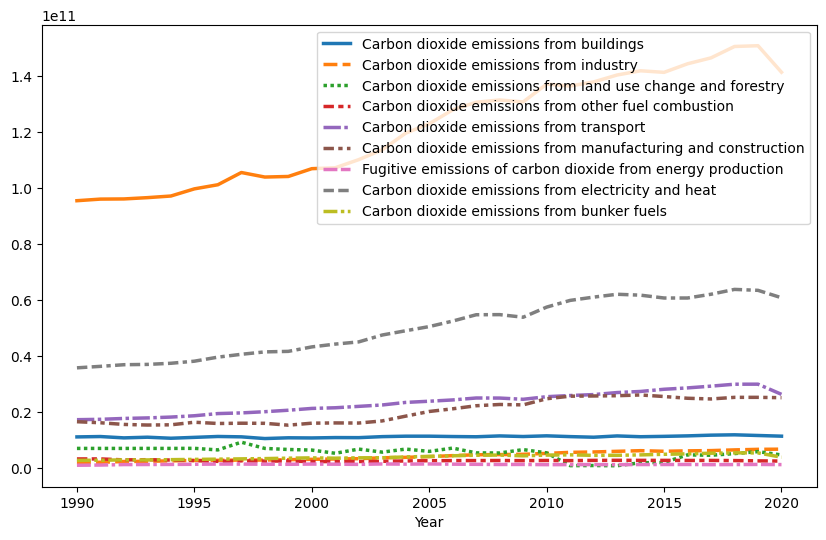

In [23]:
plt.figure(figsize=(10,6))
sns.lineplot(data=co2_per_year, linewidth= 2.5)
sns.lineplot(data=co2_per_year_sum, linewidth= 2.5)